In [1]:
import pandas as pd

In [5]:
df = pd.read_excel('C:/Users/Danie/Downloads/default of credit card clients.xls', header=1)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
import seaborn as sns

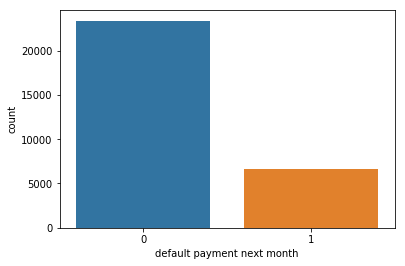

In [9]:
sns.countplot(x='default payment next month', data=df)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df.shape

(30000, 25)

In [12]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [42]:
df.filter(regex='^BILL').head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


In [ ]:
df.drop()

In [14]:
df = df.drop(['ID'], 'columns')

In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

In [30]:
import numpy as np

In [31]:
np.exp(clf.coef_)

array([[0.99999465, 0.99999095, 0.99998894, 0.99999062, 0.99984217,
        1.00001231, 1.00000972, 1.00000858, 1.00000802, 1.00000751,
        1.00000703, 0.99999088, 1.00000421, 1.00000367, 0.99999885,
        1.00000301, 1.00000307, 0.99996889, 0.99997204, 0.99999014,
        0.99999027, 0.99999154, 0.99999841]])

In [32]:
clf.coef_

array([[-5.35204757e-06, -9.04661680e-06, -1.10643771e-05,
        -9.37934610e-06, -1.57840402e-04,  1.23078573e-05,
         9.71942929e-06,  8.57598887e-06,  8.02433219e-06,
         7.51049047e-06,  7.03441967e-06, -9.11869342e-06,
         4.20927027e-06,  3.66946986e-06, -1.14861514e-06,
         3.01297122e-06,  3.06506403e-06, -3.11107038e-05,
        -2.79621743e-05, -9.86100883e-06, -9.72719265e-06,
        -8.46065538e-06, -1.59361929e-06]])

In [28]:
from sklearn.linear_model import LogisticRegressionCV

In [34]:
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

In [43]:
clf.intercept_

array([-0.00034335])

In [44]:
clf.coef_

array([[-3.96616819e-06, -6.03000277e-04, -7.34777214e-04,
        -6.25480805e-04, -1.05141252e-02,  8.33480607e-04,
         6.58362482e-04,  5.81595078e-04,  5.43342899e-04,
         5.09605335e-04,  4.78931894e-04, -8.59053484e-06,
         4.86773197e-06,  2.63268433e-06,  8.77925800e-07,
         2.39376520e-06,  1.70512714e-06, -2.49285293e-05,
        -2.34514633e-05, -1.03875297e-05, -6.30585072e-06,
        -5.57155004e-06, -2.53356286e-06]])

In [45]:
np.exp(clf.coef_)

array([[0.99999603, 0.99939718, 0.99926549, 0.99937471, 0.98954096,
        1.00083383, 1.00065858, 1.00058176, 1.00054349, 1.00050974,
        1.00047905, 0.99999141, 1.00000487, 1.00000263, 1.00000088,
        1.00000239, 1.00000171, 0.99997507, 0.99997655, 0.99998961,
        0.99999369, 0.99999443, 0.99999747]])

In [38]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

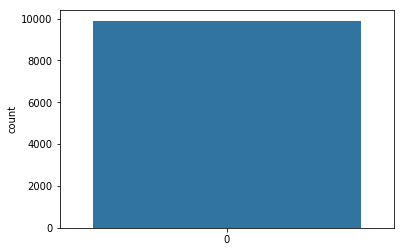

In [39]:
sns.countplot(clf.predict(X_test))

In [40]:
#qcut

In [50]:
X_test.shape

(9900, 23)

In [52]:
p = clf.predict_proba(X_test)

In [58]:
pd.DataFrame(p)[0]

0       0.607254
1       0.731633
2       0.635503
3       0.773938
4       0.742039
5       0.678844
6       0.701177
7       0.710813
8       0.879472
9       0.761164
10      0.645891
11      0.817862
12      0.730489
13      0.601812
14      0.786524
15      0.871536
16      0.691954
17      0.660116
18      0.796237
19      0.577062
20      0.864147
21      0.673722
22      0.634783
23      0.691970
24      0.956461
25      0.783220
26      0.824911
27      0.642940
28      0.887234
29      0.788412
          ...   
9870    0.674624
9871    0.663675
9872    0.806444
9873    0.774665
9874    0.700550
9875    0.804392
9876    0.783013
9877    0.718388
9878    0.690463
9879    0.616477
9880    0.754141
9881    0.689871
9882    0.703304
9883    0.776979
9884    0.671473
9885    0.841384
9886    0.811532
9887    0.781337
9888    0.607345
9889    0.830012
9890    0.678506
9891    0.901820
9892    0.813258
9893    0.802410
9894    0.974196
9895    0.712150
9896    0.721001
9897    0.7268

In [65]:
cuts = pd.qcut(pd.DataFrame(p)[0],4)

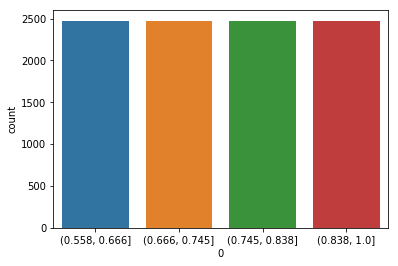

In [66]:
sns.countplot(cuts)

C:\Users\Danie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


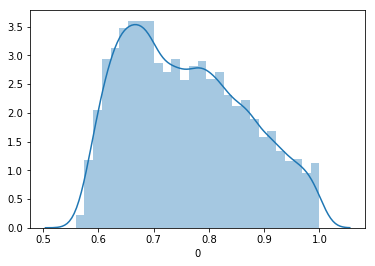

In [67]:
sns.distplot(pd.DataFrame(p)[0])

In [68]:
from sklearn.metrics import accuracy_score

In [70]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
accuracy_score(y_test, predictions)

0.7820202020202021